# LAB 10 : Restricted Boltzmann Machine

Name : Hrishikesh Pable

Roll Number : 200010037

References :

1. MNIST Dataset : http://yann.lecun.com/exdb/mnist/
2. Movie Lens Dataset : https://grouplens.org/datasets/movielens/
3. https://towardsdatascience.com/restricted-boltzmann-machine-how-to-create-a-recommendation-system-for-movie-review-45599a406deb
4. https://towardsdatascience.com/restricted-boltzmann-machine-as-a-recommendation-system-for-movie-review-part-2-9a6cab91d85b
5. https://github.com/echen/restricted-boltzmann-machines

# **Problem 1** : MNIST Digit Classification using RBM + Logistic Regression

1. Consider MNIST Digit Dataset
2. Use the Bernoulli RBM API from Sci-kit learn package and create a pipeline of RBM network and logistic regression to classify the digits

## Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming :
  Please write a program to demonstrate the same

2024-03-26 08:01:43.385397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 08:01:43.385451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 08:01:43.387061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


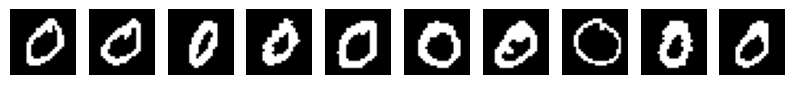

In [1]:
# Prepare the data

import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Randomly select 600 samples from each class in the training set
np.random.seed(0)
num_classes = 10

x_train_list = []
y_train_list = []
for i in range(num_classes):
    x_train_list.append(x_train[y_train == i][:600])
    y_train_list.append(y_train[y_train == i][:600])
x_train = np.concatenate(x_train_list)
y_train = np.concatenate(y_train_list)

# Randomly select 200 samples from each class in the test

x_test_list = []
y_test_list = []
for i in range(num_classes):
    x_test_list.append(x_test[y_test == i][:200])
    y_test_list.append(y_test[y_test == i][:200])
x_test = np.concatenate(x_test_list)
y_test = np.concatenate(y_test_list)

# Since Bernoulli RBM works with binary data, we binarize the data
x_train = (x_train > 127).astype(float)
x_test = (x_test > 127).astype(float)

# Plot the first 10 samples
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')

In [2]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

In [3]:
# Training the classifier

from sklearn.base import clone

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.

rbm.learning_rate = 0.06
rbm.n_iter = 30

# More components tend to give better prediction performance, but larger
# fitting time

rbm.n_components = 200
logistic.C = 6000.0

# Training RBM-Logistic Pipeline

rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

# Training the Logistic regression classifier directly on the pixel

raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(x_train.reshape(-1, 784), y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -173.63, time = 2.04s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -147.03, time = 2.27s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -121.17, time = 2.51s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -108.85, time = 2.73s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -104.17, time = 2.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -96.93, time = 2.21s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -99.14, time = 2.39s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -97.24, time = 2.24s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -100.66, time = 2.26s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -92.96, time = 2.21s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -95.70, time = 2.24s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -92.63, time = 2.35s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -91.90, time = 2.27s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -89.15, time = 2.21s
[BernoulliRBM] Iteratio

LogisticRegression(C=100.0, solver='newton-cg', tol=1)

In [4]:
from sklearn import metrics

y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

y_pred = raw_pixel_classifier.predict(x_test.reshape(-1, 784))
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       200
           1       0.95      0.98      0.96       200
           2       0.83      0.83      0.83       200
           3       0.82      0.82      0.82       200
           4       0.88      0.83      0.86       200
           5       0.85      0.83      0.84       200
           6       0.89      0.89      0.89       200
           7       0.86      0.85      0.86       200
           8       0.77      0.73      0.75       200
           9       0.80      0.84      0.82       200

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       200
           1       0.90      0.98      0.94  

In [5]:
# Vary the number of components and plot the results

n_components = [10, 50, 100, 200, 500]
logistic.C = 6000.0
rbm.learning_rate = 0.06
rbm.n_iter = 20

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

for n_component in n_components:
    print("Extracting the top %d RBM components..." % (n_component))
    rbm.n_components = n_component
    rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

    y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
    print("Logistic regression using RBM features, %d components:\n%s\n" % (
        n_component, metrics.classification_report(y_test, y_pred)))



Extracting the top 10 RBM components...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -235.94, time = 0.32s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -233.79, time = 0.36s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -228.49, time = 0.37s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -228.01, time = 0.36s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -227.74, time = 0.38s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -217.48, time = 0.37s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -218.77, time = 0.36s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -212.50, time = 0.37s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -213.78, time = 0.37s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -214.06, time = 0.36s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -211.75, time = 0.37s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -206.93, time = 0.37s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -194.17, time = 0.36s
[BernoulliRBM] Iteration 14, pseudo-likelihood

Fitting Logistic regression with C = 0.001000
[BernoulliRBM] Iteration 1, pseudo-likelihood = -175.01, time = 1.31s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -138.81, time = 1.46s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -124.33, time = 1.46s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -119.38, time = 1.47s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -121.90, time = 1.45s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -105.32, time = 1.52s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -104.70, time = 1.43s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -111.48, time = 1.45s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -101.96, time = 1.48s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -101.15, time = 1.48s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -107.25, time = 1.47s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -108.10, time = 1.69s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -101.99, time = 1.32s
[BernoulliRBM] Iteration 14, pseudo-like

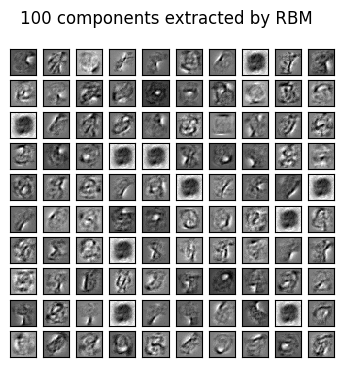

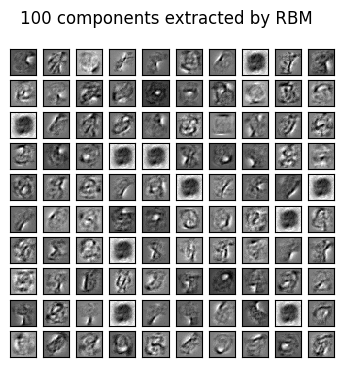

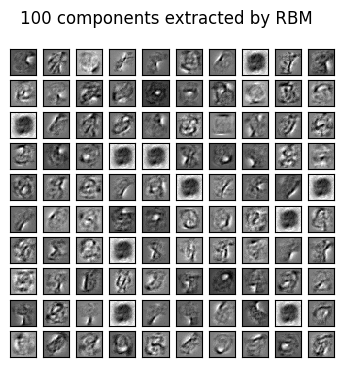

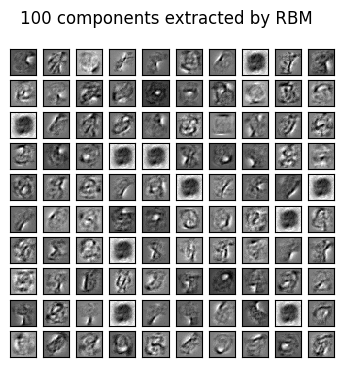

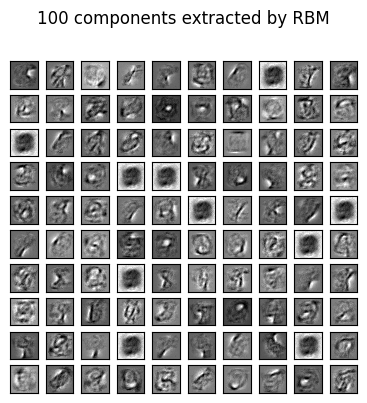

In [12]:
# Vary the C parameter of the Logistic regression and plot the results

Cs = [0.001, 0.01, 0.1, 1, 10]
n_components = 100
rbm.n_components = n_components
rbm.learning_rate = 0.06

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

for C in Cs:
    print("Fitting Logistic regression with C = %f" % C)
    logistic.C = C
    rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

    y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
    print("Logistic regression using 100 RBM features: \n%s\n" % (metrics.classification_report(y_test, y_pred)))

    plt.figure(figsize=(4.2, 4))
    for i, comp in enumerate(rbm.components_):
        plt.subplot(10, 10, i + 1)
        plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

    plt.suptitle('100 components extracted by RBM')
    
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

1. RBM + logistic classifier requires binary input data and hence the MNIST dataset is binarized.

2. RBM + logistic classifier with 200 components works better than logistic regression alone.

3. As the number of components in RBM increases, the accuracy of the model increases.

4. Increasing C value in logistic regression increases the accuracy of the model.

# **Problem 2** : RBM as a Recommendation System for Movie Review on Movie Lens Dataset

1. Use the Movie Lens Dataset, Split it into train-test set. Convert the ratings to Binary (The task is to predict if the user likes a movie or not)
2. Build a RBM network, train the model and test it on the test set

## Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming :
  Please write a program to demonstrate the same

In [187]:
import pandas as pd

train_set = pd.read_csv('/kaggle/input/movie-lens-small/ml-100k/u2.base', delimiter='\t')
train_set.head()

,1,3,4,878542960
0,1,4,3,876893119
1,1,5,3,889751712
2,1,6,5,887431973
3,1,7,4,875071561
4,1,10,3,875693118


In [188]:
train_set = np.array(train_set, dtype = 'int')
train_set.dtype

dtype('int64')

In [189]:
test_set = pd.read_csv('/kaggle/input/movie-lens-small/ml-100k/u2.test', delimiter = '\t') 
test_set = np.array(test_set, dtype = 'int')
test_set.dtype

dtype('int64')

In [190]:
print('Total number of Users in Training Set' , train_set[:,0].max())
print('Total number of Movies in Training Set', train_set[:,1].max())
print('Total number of Users in Testing Set' , test_set[:,0].max())
print('Total number of Movies in Testing Set', test_set[:,1].max())

Total number of Users in Training Set 943
Total number of Movies in Training Set 1682
Total number of Users in Testing Set 658
Total number of Movies in Testing Set 1624


In [191]:
t_users = int(max(max(train_set[:,0]), max(test_set[:,0])))
t_movies = int(max(max(train_set[:,1]), max(test_set[:,1])))

print(f'The total number of Users are {t_users} and total number of Movies are {t_movies}')

The total number of Users are 943 and total number of Movies are 1682


In [192]:
def preprocess(dataset):
    new_data = []                               
    for user_id in range(1, (t_users + 1)):       
        movie_ids = dataset[:,1][dataset[:,0]==user_id]
        rating_ids = dataset[:,2][dataset[:,0]==user_id]
        ratings = np.zeros(t_movies)
        ratings[movie_ids - 1] = rating_ids 
        new_data.append(list(ratings))
    
    return new_data

In [193]:
# applying the function above to training and test set
train_set = preprocess(train_set)
test_set = preprocess(test_set)

In [194]:
train_set[0][:5]

[0.0, 0.0, 0.0, 3.0, 3.0]

In [195]:
print(len(train_set))
print(len(train_set[0]))
print(len(test_set))
print(len(test_set[0]))

943
1682
943
1682


In [196]:
import torch

train_set = torch.FloatTensor(train_set)
test_set = torch.FloatTensor(test_set)

In [197]:
train_set[train_set == 0] = -1
test_set[test_set == 0] = -1

In [198]:
print(train_set[0][:5])

tensor([-1., -1., -1.,  3.,  3.])


In [199]:
train_set[torch.logical_and(train_set <= 2.5, train_set >= 0)] = 0
train_set[train_set > 2.5] = 1

test_set[torch.logical_and(test_set <= 2.5, test_set >= 0)] = 0
test_set[test_set > 2.5] = 1

In [200]:
print(train_set[0][:10])

tensor([-1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.])


In [201]:
class RBM():
    def __init__(self, nv, nh):
        self.W = torch.randn(nh, nv)
        self.a = torch.randn(1, nh)
        self.b = torch.randn(1, nv)
        
    def sample_h(self, x):
        wx = torch.mm(x, self.W.t())
        activation = wx + self.a.expand_as(wx)
        p_h_given_v = torch.sigmoid(activation)
        return p_h_given_v, torch.bernoulli(p_h_given_v)
    
    def sample_v(self, y):
        wy = torch.mm(y, self.W)
        activation = wy + self.b.expand_as(wy)
        p_v_given_h = torch.sigmoid(activation)
        return p_v_given_h, torch.bernoulli(p_v_given_h)
    
    def train(self, v0, vk, ph0, phk):
        self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
        self.b += torch.sum((v0-vk), 0)
        self.a += torch.sum((ph0-phk), 0)

In [202]:
nv = len(train_set[0])      # no. of visible nodes
nh = 100                    # the features to be detected by RBM, hence can define any relevant number
batch_size = 100
rbm = RBM(nv, nh)

In [203]:
nb_epoch = 10        # 10 because as we have a binary outcome and less data, the model will converge quickly

# creating a for loop to iterate through these epochs and in each epoch all observations go in the network 
# and then updating the weights after observations of each batch that passed through the network
# and then we get our final visible nodes with new ratings for the movies that were not orignally rated
for epoch in range(1, nb_epoch+1):
    train_loss = 0                      
    s = 0.                          
    
    for id_user in range(0, t_users - batch_size, batch_size):
        vk = train_set[id_user:id_user+batch_size]
        v0 = train_set[id_user:id_user+batch_size]
        ph0,_ = rbm.sample_h(v0)
        
        for k in range(10):
            _,hk = rbm.sample_h(vk)
            _,vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0<0] 
    
        phk,_ = rbm.sample_h(vk)
        rbm.train(v0, vk, ph0, phk)
        
        train_loss += torch.mean(torch.abs(v0[v0 >= 0] - vk[v0 >= 0]))
        s += 1.
        
    print('epoch: ' + str(epoch) + ' loss: ' + str(train_loss/s) )

epoch: 1 loss: tensor(0.3274)
epoch: 2 loss: tensor(0.2464)
epoch: 3 loss: tensor(0.2521)
epoch: 4 loss: tensor(0.2519)
epoch: 5 loss: tensor(0.2502)
epoch: 6 loss: tensor(0.2517)
epoch: 7 loss: tensor(0.2463)
epoch: 8 loss: tensor(0.2548)
epoch: 9 loss: tensor(0.2393)
epoch: 10 loss: tensor(0.2507)


In [204]:
print("Training accuracy: " + str(1-train_loss/s) )

Training accuracy: tensor(0.7493)


In [205]:
test_loss = 0                      
s = 0.                          

for id_user in range(t_users):           
    v = train_set[id_user:id_user+1]      
    vt = test_set[id_user:id_user+1]      
    
    if len(vt[vt>=0]) > 0:           
        _,h = rbm.sample_h(v)
        _,v = rbm.sample_v(h)
        
        test_loss += torch.mean(torch.abs(vt[vt >= 0] - v[vt >= 0]))
        s += 1.

print('test_loss: ' + str(test_loss/s) )

test_loss: tensor(0.2519)


In [206]:
print("Testing accuracy: " + str(1 - test_loss/s))

Testing accuracy: tensor(0.7481)


## Inferences and Conclusion : State all the key observations and conclusion

1. RBM can be used for creating a recommendation system.

2. It gives a fairly good accurcy of 75 percent.